In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
zomato=pd.read_csv("D:\\kaggle projects\\zomato.csv\\zomato.csv",sep=",",header=0,encoding='latin')

In [ ]:
zomato.head()

In [4]:
zomato.shape

(51717, 17)

In [5]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
((zomato.isnull() | zomato.isna()).sum() * 100 / zomato.index.size).round(2) 

url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [7]:
zomato = zomato.drop(["url","address","phone"],axis=1)

In [8]:
zomato['rate']=zomato['rate'].str.replace("/5","")

In [9]:
zomato['rate'] = zomato['rate'].replace('NEW',np.NaN)
zomato['rate'] = zomato['rate'].replace('-',np.NaN)

In [10]:
zomato.rate = zomato.rate.astype('float')

Text(0.5, 0, 'Number of outlets')

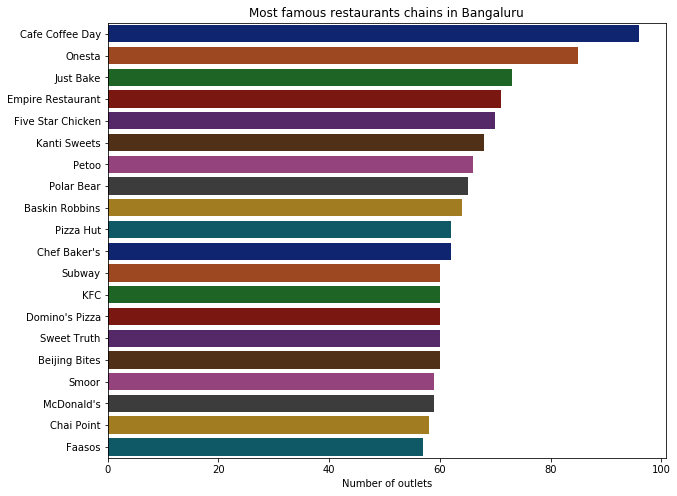

In [11]:
#the top restaurant names having   most number of  outlets in Bangaluru? 
plt.figure(figsize=(10,8))#length width
top=zomato['name'].value_counts()[:20]#top 20
sns.barplot(x=top,y=top.index,palette='dark')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

In [12]:
zomato['name'].value_counts().head(20)

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Pizza Hut            62
Chef Baker's         62
Subway               60
KFC                  60
Domino's Pizza       60
Sweet Truth          60
Beijing Bites        60
Smoor                59
McDonald's           59
Chai Point           58
Faasos               57
Name: name, dtype: int64

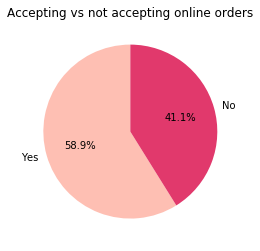

In [13]:
#How many of the restuarants do not accept online orders? 
import matplotlib.pyplot as plt
x=zomato['online_order'].value_counts()
colors = ['#FEBFB3', '#E1396C']
plt.pie(x, labels=x.index, colors=colors,startangle=90,autopct='%.1f%%')

plt.title('Accepting vs not accepting online orders')
plt.show()

In [14]:
zomato['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

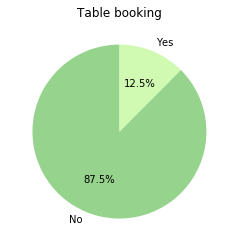

In [15]:
#What is the ratio b/w restaurants that provide and do not provide table booking ? 
import matplotlib.pyplot as plt
x=zomato['book_table'].value_counts()
colors = ['#96D38C', '#D0F9B1']
plt.pie(x, labels=x.index, colors=colors,startangle=90,autopct='%.1f%%')

plt.title('Table booking')
plt.show()

In [16]:
zomato['book_table'].value_counts()
#In bengalore people usually prefer fast service hence may be only for big big restaurants there is a table facilities

No     45268
Yes     6449
Name: book_table, dtype: int64

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
Takeaway, Delivery             2037
Casual Dining, Bar             1154
Bakery                         1141
Beverage Shop                   867
Bar                             697
Food Court                      624
Sweet Shop                      468
Bar, Casual Dining              425
Lounge                          396
Pub                             357
Fine Dining                     346
Casual Dining, Cafe             319
Beverage Shop, Quick Bites      298
Bakery, Quick Bites             289
Mess                            267
Name: rest_type, dtype: int64


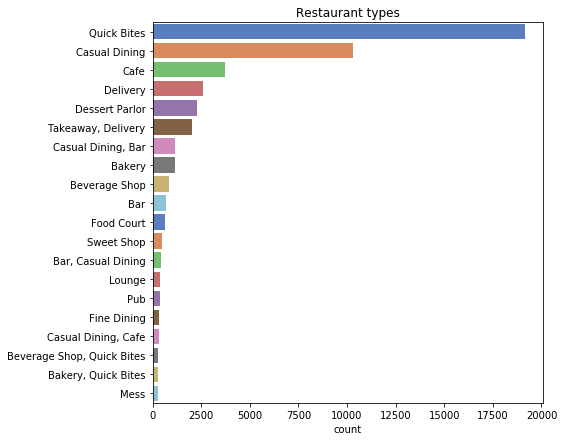

In [17]:
#Which are the most common restaurant type in Banglore? 
plt.figure(figsize=(7,7))
rest=zomato['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index,palette='muted')
plt.title("Restaurant types")
plt.xlabel("count")
print(zomato['rest_type'].value_counts()[:20])

In [18]:
#In quick bytes top 10 dishes liked by the people
zomato.query("rest_type=='Quick Bites'")['dish_liked'].head(10)

3                                           Masala Dosa
31    Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34    Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
36                                                  NaN
39                                                  NaN
40    Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...
42                        Burgers, Fries, Hot Chocolate
43    Pane Pizza, Lava Cake, Pasta, Stuffed Garlic B...
46                                              Biryani
49                                       Paratha, Pasta
Name: dish_liked, dtype: object

In [19]:
#In quick bytes top 10 cuisines liked by the people
zomato.query("rest_type=='Quick Bites'")['cuisines'].head(10)

3                   South Indian, North Indian
31    North Indian, Fast Food, Chinese, Burger
34            North Indian, Biryani, Fast Food
36            North Indian, Chinese, Fast Food
39                                South Indian
40                      Street Food, Fast Food
42                           Burger, Fast Food
43                            Pizza, Fast Food
46                       North Indian, Chinese
49         North Indian, Chinese, Momos, Rolls
Name: cuisines, dtype: object

In [20]:
zomato.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

In [21]:
zomato['approx_cost_for_2_people']=zomato['approx_cost_for_2_people'].str.replace(",","")

In [22]:
zomato.approx_cost_for_2_people=pd.to_numeric(zomato.approx_cost_for_2_people)

In [23]:
#top 10 quick bytes restaurants with low cost
zomato.query("rest_type=='Quick Bites' & rate>=4.5 & votes>=500 & approx_cost_for_2_people<=1500")[['name',"rate","votes","approx_cost_for_2_people","location"]].sort_values("approx_cost_for_2_people",ascending=True).head(10)

,name,rate,votes,approx_cost_for_2_people,location
632,Taaza Thindi,4.7,651,100.0,Banashankari
3338,Brahmin's Coffee Bar,4.8,2679,100.0,Basavanagudi
39518,CTR,4.7,4408,150.0,Malleshwaram
39755,Veena Stores,4.5,2407,150.0,Malleshwaram
40161,CTR,4.7,4408,150.0,Malleshwaram
46436,Veena Stores,4.5,2416,150.0,Malleshwaram
46445,CTR,4.8,4421,150.0,Malleshwaram
46973,CTR,4.8,4421,150.0,Malleshwaram
3336,Mavalli Tiffin Room (MTR),4.5,2896,250.0,Basavanagudi
51311,Mooch Marod,4.5,504,350.0,Whitefield


In [24]:
#In casual dining top 10 cuisines liked by the people
zomato.query("rest_type=='Casual Dining'")['cuisines'].head(10)

0                        North Indian, Mughlai, Chinese
1                           Chinese, North Indian, Thai
4                              North Indian, Rajasthani
5                                          North Indian
6           North Indian, South Indian, Andhra, Chinese
37                                 Chinese, Thai, Momos
38         North Indian, Mughlai, South Indian, Chinese
47                North Indian, Chinese, Biryani, Rolls
48                                        Chinese, Thai
53    Biryani, North Indian, Chinese, Andhra, South ...
Name: cuisines, dtype: object

In [25]:
#In casual dining top 10 restaurants with rating>4.5,votes>200 and cost<1500
zomato.query("rest_type=='Casual Dining' & rate>=4.5 & votes>=500 & approx_cost_for_2_people<=1500")[['name',"rate","votes","approx_cost_for_2_people","location"]].sort_values("approx_cost_for_2_people",ascending=True).head(10)

,name,rate,votes,approx_cost_for_2_people,location
3444,Meghana Foods,4.5,4569,600.0,Jayanagar
21039,Meghana Foods,4.5,4455,600.0,Jayanagar
22355,Meghana Foods,4.5,4432,600.0,Jayanagar
2653,Pin Me Down,4.5,784,800.0,BTM
23851,Imperio Restaurant,4.5,1228,800.0,Kalyan Nagar
23925,Imperio Restaurant,4.5,1228,800.0,Kalyan Nagar
24677,Imperio Restaurant,4.5,1228,800.0,Kalyan Nagar
25232,Imperio Restaurant,4.5,1228,800.0,Kalyan Nagar
26860,Pin Me Down,4.5,804,800.0,BTM
29622,Pin Me Down,4.5,811,800.0,BTM


Biryani                                                                                       182
Chicken Biryani                                                                                73
Friendly Staff                                                                                 69
Waffles                                                                                        68
Paratha                                                                                        57
Masala Dosa                                                                                    56
Coffee                                                                                         42
Rooftop Ambience                                                                               42
Pizza                                                                                          38
Burgers                                                                                        33
Cocktails           

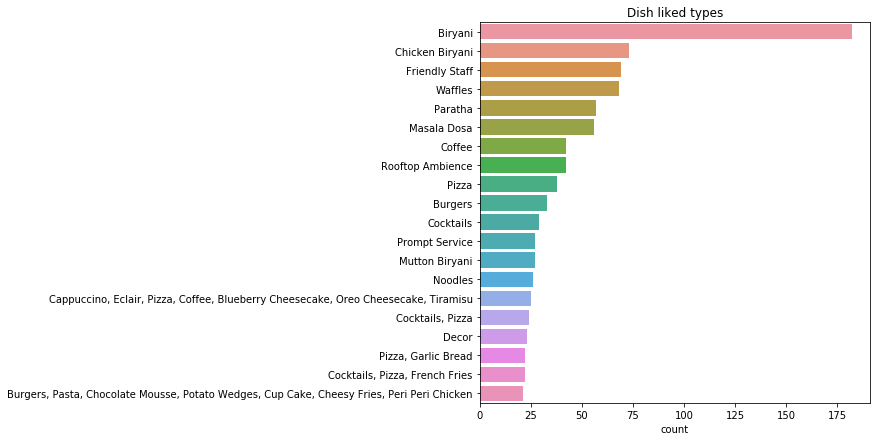

In [26]:
#Which are the most common dish liked type in Banglore? 
plt.figure(figsize=(7,7))
rest=zomato['dish_liked'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Dish liked types")
plt.xlabel("count")
print(zomato['dish_liked'].value_counts()[:20])

North Indian                           2913
North Indian, Chinese                  2385
South Indian                           1828
Biryani                                 918
Bakery, Desserts                        911
Fast Food                               803
Desserts                                766
Cafe                                    756
South Indian, North Indian, Chinese     726
Bakery                                  651
Chinese                                 556
Ice Cream, Desserts                     417
Chinese, North Indian                   415
Mithai, Street Food                     372
Desserts, Ice Cream                     354
North Indian, Chinese, Biryani          352
South Indian, North Indian              343
North Indian, South Indian              343
North Indian, South Indian, Chinese     305
Beverages                               301
Name: cuisines, dtype: int64


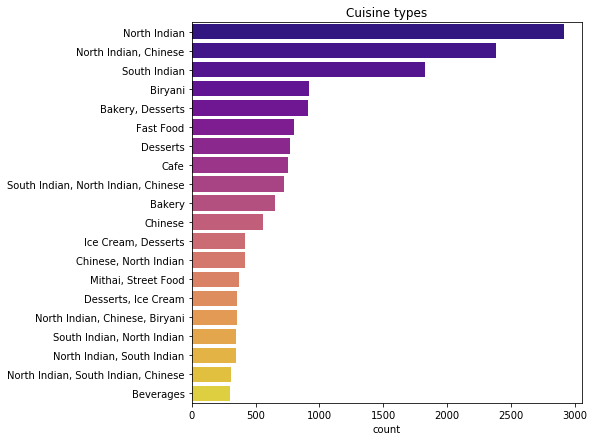

In [27]:
#Which are the most common cuisines type in Banglore? 
plt.figure(figsize=(7,7))
rest=zomato['cuisines'].value_counts()[:20]
sns.barplot(rest,rest.index,palette='plasma')
plt.title("Cuisine types")
plt.xlabel("count")
print(zomato['cuisines'].value_counts()[:20])

In [29]:
new=zomato[['name','approx_cost_for_2_people','rate','rest_type','location','cuisines','online_order','votes','listed_in_type','listed_in_city']].dropna()


In [32]:
zomato['approx_cost_for_2_people'].describe()
#50% of the restuarants have cost below 400

count    51371.000000
mean       555.431566
std        438.850728
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_cost_for_2_people, dtype: float64

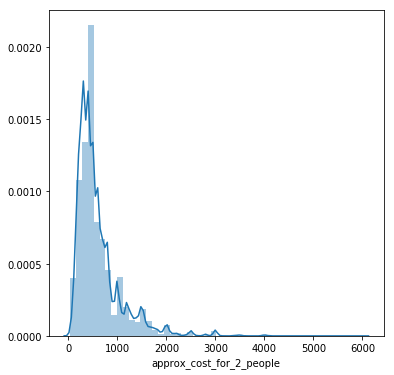

In [31]:
#cost distribution
#most of the  restaurants has cost less than 1000
plt.figure(figsize=(6,6))
sns.distplot(new['approx_cost_for_2_people'])
plt.show()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Name: location, dtype: int64


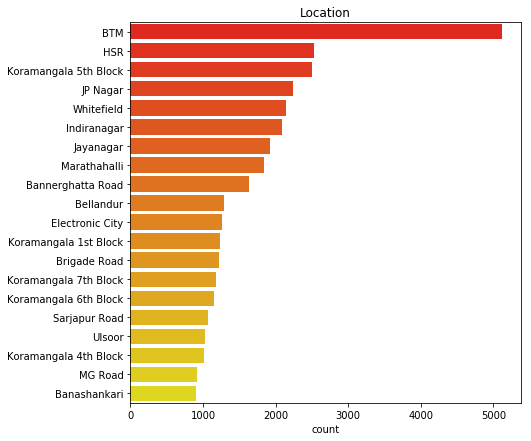

In [33]:
#which location has highest number of restaurants
#It shows that BTM has highest number of restaurants
plt.figure(figsize=(7,7))
rest=zomato['location'].value_counts()[:20]
sns.barplot(rest,rest.index,palette='autumn')
plt.title("Location")
plt.xlabel("count")    
print(zomato["location"].value_counts()[:20])

In [37]:
#which type of restaturants are more in number in  BTM
zomato.query("location=='BTM'")['rest_type'].value_counts()

Quick Bites                      2733
Casual Dining                     711
Takeaway, Delivery                334
Cafe                              291
Delivery                          254
Beverage Shop                     193
Dessert Parlor                    112
Bakery                             77
Sweet Shop                         50
Bar                                49
Beverage Shop, Quick Bites         33
Sweet Shop, Quick Bites            26
Takeaway                           26
Casual Dining, Bar                 22
Quick Bites, Beverage Shop         18
Quick Bites, Sweet Shop            18
Mess                               18
Casual Dining, Microbrewery        17
Dessert Parlor, Beverage Shop      17
Quick Bites, Dessert Parlor        17
Cafe, Quick Bites                  16
Cafe, Bakery                       13
Dhaba                              12
Bakery, Quick Bites                11
Pub, Casual Dining                 10
Bar, Casual Dining                  6
Dessert Parl

In [39]:
#which type of cuisines are famous in BTM 
zomato.query("location=='BTM'")['cuisines'].value_counts().head(10)

North Indian, Chinese                  379
North Indian                           340
Biryani                                120
South Indian                           113
Fast Food                              112
Beverages                               87
Chinese, North Indian                   83
South Indian, North Indian, Chinese     78
Biryani, North Indian                   76
Cafe                                    68
Name: cuisines, dtype: int64

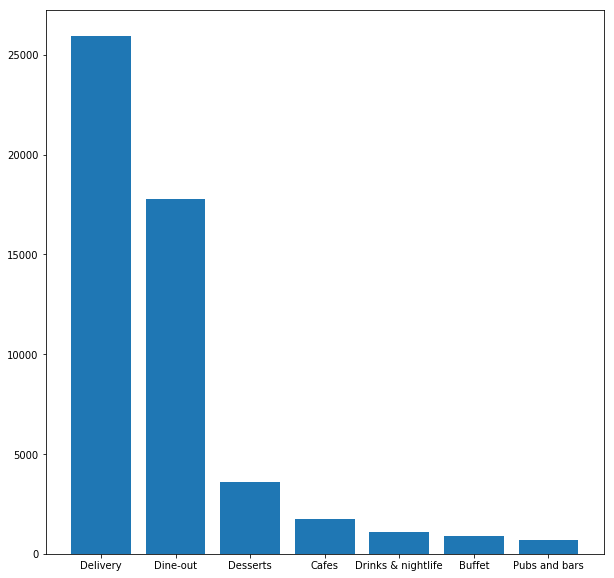

In [41]:
#delivery type is more
plt.figure(figsize=(10,10))
plt.bar(zomato["listed_in_type"].value_counts().index,zomato["listed_in_type"].value_counts().values)
plt.show()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Name: listed_in_city, dtype: int64


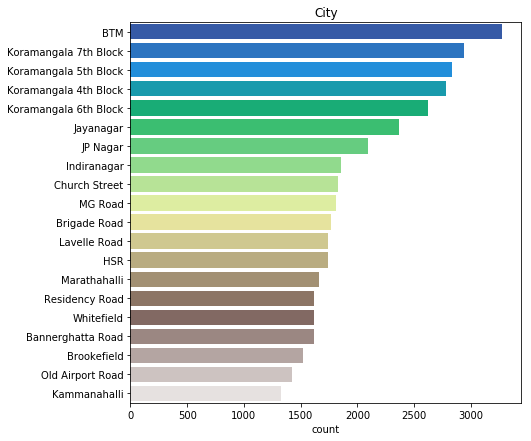

In [42]:
plt.figure(figsize=(7,7))
rest=zomato['listed_in_city'].value_counts()[:20]
sns.barplot(rest,rest.index,palette='terrain')
plt.title("City")
plt.xlabel("count")    
print(zomato["listed_in_city"].value_counts()[:20])

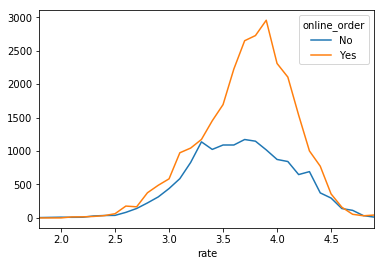

In [43]:
#rate vs online order
#It shows that restaurant will get a high rating if it has online order facility. because in zomato app we have a rating option 
pd.crosstab(zomato['rate'], zomato['online_order']).plot()
plt.show()

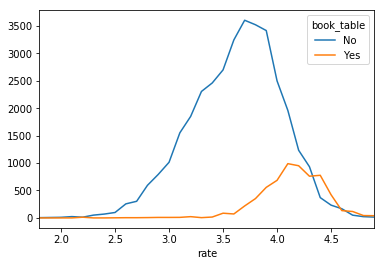

In [44]:
#rate vs book table
#This shows that very few restaurants have the facility of booking tables and the rating for those restaurants are quite high
pd.crosstab(zomato['rate'], zomato['book_table']).plot()
plt.show()

<Figure size 1080x1080 with 0 Axes>

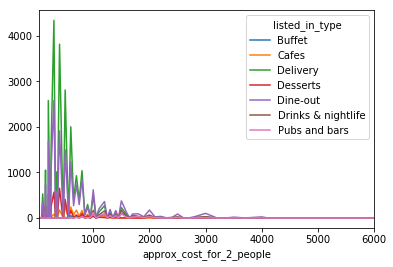

In [45]:
#cost vs typs
plt.figure(figsize=(15,15))
pd.crosstab(zomato['approx_cost_for_2_people'], zomato['listed_in_type']).plot()
plt.show()

#shows that pubs and bars have the highest cost.

In [46]:
zomato['listed_in_type'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in_type, dtype: int64

<Figure size 720x504 with 0 Axes>

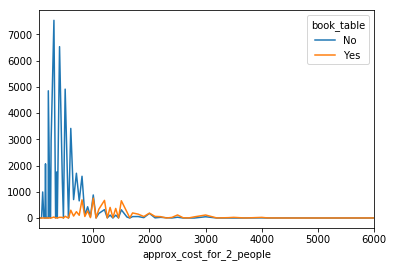

In [47]:
#cost is more for if we prefer table
plt.figure(figsize=(10,7))
pd.crosstab(zomato['approx_cost_for_2_people'], zomato['book_table']).plot()
plt.show()

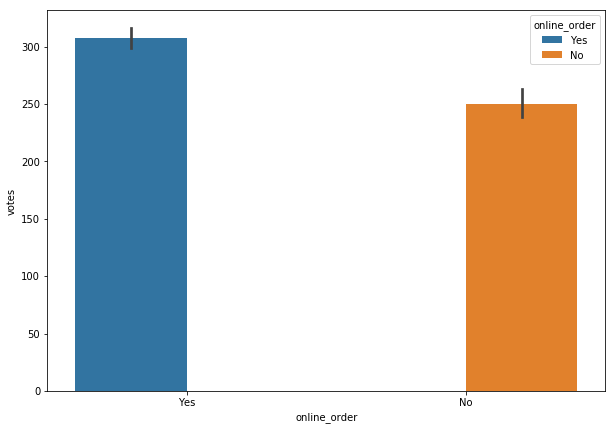

In [48]:
#online order vs votes
#Is there any difference b/w votes of restaurants accepting and not accepting online orders? 
plt.figure(figsize=(10,7))
sns.barplot(x="online_order",y='votes',hue='online_order',data=zomato)
plt.show()
#votes are more for online rest

In [49]:
#online order vs location
#in which location online order is more? top5

new.query("online_order=='Yes'").groupby('location',as_index=False).count()[['location','online_order']].sort_values("online_order",ascending=False).head()
#new.groupby('location','online_order').count()[['location','online_order']]

,location,online_order
0,BTM,2861
22,HSR,1659
44,Koramangala 5th Block,1526
27,Indiranagar,1258
31,Jayanagar,1232


In [50]:
#online order vs location
#in which location online order is less? top5

new.query("online_order=='No'").groupby('location',as_index=False).count()[['location','online_order']].sort_values("online_order",ascending=True).head()


,location,online_order
84,West Bangalore,1
62,Peenya,1
66,Rammurthy Nagar,2
37,Kanakapura Road,2
38,Kengeri,2


In [51]:
#online order vs cuisines
#which type of cuisine people ordering more 
new.query("online_order=='Yes'").groupby('cuisines',as_index=False).count()[['cuisines','online_order']].sort_values("online_order",ascending=False).head()


,cuisines,online_order
1132,North Indian,1481
1179,"North Indian, Chinese",1221
1542,South Indian,650
166,"Bakery, Desserts",392
242,Biryani,355


In [ ]:
#rate vs type 
#for delivery type people vote more for the food followed by dine out
plt.figure(figsize=(15,15))
pd.crosstab(zomato['rate'], zomato['listed_in_type']).plot()
plt.show()

In [ ]:
#rest type vs cost
plt.figure(figsize=(10,7))
sns.barplot(x="rest_type",y='approx_cost_for_2_people',hue='rest_type',data=new)
plt.show()

In [ ]:
#cheapest restaurants with high rating and high voting
#Cost is below 1500 ,Rating is above 4.5, Votes are above 200


new.query("approx_cost_for_2_people<=1500 & rate>=4.5 & votes>=200")[["name", "location", "approx_cost_for_2_people", "rest_type", "cuisines","votes"]].sort_values("approx_cost_for_2_people",ascending=True).head(20)

In [ ]:
#expensive restaturants with high rating and votes and cost >=3000
new.query("approx_cost>=3000 & rate>=4.5 & votes>=200")[["name", "location", "approx_cost_for_2_people", "rest_type", "cuisines","votes"]].sort_values("approx_cost_for_2_people",ascending=False).head(20)